In [48]:
import tensorflow as tf

In [49]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

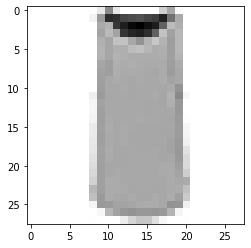

In [51]:
plt.imshow(X_train[2], cmap="gray_r")

In [52]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [53]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [54]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [55]:
X_train.shape

(60000, 28, 28, 1)

In [56]:
X_train.max(), X_train.min()

(255, 0)

In [57]:
X_train = X_train / 255
X_test = X_test / 255

In [58]:
X_train.max(), X_train.min()

(1.0, 0.0)

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Input, Dropout
from tensorflow.keras import Model

In [85]:
model = Sequential()

i = Input(shape = X_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)

model = Model(i,x)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [86]:
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 13, 13, 32)        320       
                                                                 
 conv2d_39 (Conv2D)          (None, 6, 6, 64)          18496     
                                                                 
 conv2d_40 (Conv2D)          (None, 2, 2, 128)         73856     
                                                                 
 flatten_13 (Flatten)        (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_24 (Dense)            (None, 512)               2626

In [88]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.5218 - accuracy: 0.8072 - val_loss: 0.4091 - val_accuracy: 0.8413
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3646 - accuracy: 0.8636 - val_loss: 0.3429 - val_accuracy: 0.8742
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3140 - accuracy: 0.8828 - val_loss: 0.3125 - val_accuracy: 0.8821
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2796 - accuracy: 0.8945 - val_loss: 0.3009 - val_accuracy: 0.8870
Epoch 5/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2529 - accuracy: 0.9049 - val_loss: 0.2885 - val_accuracy: 0.8946
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2333 - accuracy: 0.9117 - val_loss: 0.2930 - val_accuracy: 0.8930
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2136 - accuracy: 0.9199 - val_loss: 0.2982 -

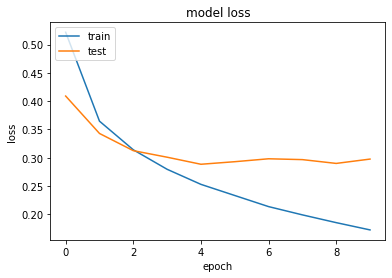

In [89]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [91]:
predictions = model.predict(X_test)

In [93]:
predictions = np.argmax(predictions, axis=1)

In [94]:
from sklearn.metrics import classification_report, confusion_matrix

In [95]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.82      0.89      0.85      1000
           3       0.93      0.88      0.90      1000
           4       0.83      0.82      0.83      1000
           5       0.98      0.98      0.98      1000
           6       0.72      0.71      0.72      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



0: T-shirt/top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle boot

In [96]:
print(confusion_matrix(y_test, predictions))

[[863   3  22  10   4   0  93   0   5   0]
 [  1 978   1  10   4   0   5   0   1   0]
 [ 15   0 885   7  33   0  59   0   1   0]
 [ 16   8  24 882  46   1  23   0   0   0]
 [  1   1  69  12 823   0  92   0   2   0]
 [  0   0   0   1   0 977   0  13   0   9]
 [105   0  73  26  76   0 714   0   6   0]
 [  0   0   0   0   0  11   0 959   0  30]
 [  1   0   9   5   5   2   4   2 972   0]
 [  1   0   0   0   0   4   0  26   0 969]]
